# **Tutorial**: Using the simulator `lt.DecoderSimple`

[<<< Back to the simulator index](https://github.com/juangamella/causal-chamber-package/tree/main/causalchamber/simulators)

Other links:
- [Derivation of the simulators](TODO) -> TODO
- [Simulators source code](https://github.com/juangamella/causal-chamber-package/blob/main/causalchamber/simulators/lt/image/decoder.py)

If you use the simulator in your work, please consider citing:

```
TODO
```

In [1]:
import sys
sys.path = ['../../../'] + sys.path

# %load_ext autoreload
# %autoreload 2

## Dependencies

This simulator requires PyTorch as a dependency. This includes the Python packages `torch` and `torchvision`, specified in the `tutorials/requirements.txt` file and as additional dependencies to the `causalchamber` package (option `[torch]`).

The notebook also uses `matplotlib`, `numpy` and `pandas` (also specified in `tutorials/requirements.txt`).

In [2]:
import causalchamber
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Fetching list of available datasets from https://causalchamber.s3.eu-central-1.amazonaws.com/downloadables/directory.yaml ... done.
If you use our datasets or simulators for your work please consider citing:

﻿@article{gamella2025chamber,
  author={Gamella, Juan L. and Peters, Jonas and B{"u}hlmann, Peter},
  title={Causal chambers as a real-world physical testbed for {AI} methodology},
  journal={Nature Machine Intelligence},
  doi={10.1038/s42256-024-00964-x},
  year={2025},
}



Also consider citing the paper in which the simulator was developed:
    
```
@article{gamellabing2025sanity,
  title     = {Sanity Checking Causal Representation Learning on a Simple Real-World System},
  author    = {Gamella*, Juan L. and Bing*, Simon and Runge, Jakob},
  year      = {2025},
  journal   = {arXiv preprint arXiv:TODO},
  note      = {*equal contribution}
}
```

## Initializing the simulator

First, import and instantiate the simulator. This will download the pre-trained model into the path given by `root=`.

In [3]:
import causalchamber.simulators.lt as lt
simulator = lt.DecoderSimple(root='./') # store pre-trained model in the current directory

Pre-trained model "torch_model_b47bda6af1dbf813dc35b5902026dd63.pkl" found in "./".
Model loaded.


## Running the simulator

To simulate, call the function `.simulate_from_inputs` with a dataframe containing the simulator inputs as columns. There can be additional columns, which the simulator will ignore.

The names of the necessary columns can be obtained as:

In [4]:
simulator.inputs_names

['red', 'green', 'blue', 'pol_1', 'pol_2']

### Example 1: Random inputs

For example, let's generate some images from random inputs:

In [5]:
rng = np.random.default_rng(7); N = 5

inputs = pd.DataFrame({'red': rng.uniform(0,255,size=N),
                       'green': rng.uniform(0,255,size=N),
                       'blue': rng.uniform(0,255,size=N),
                       'pol_1': rng.uniform(-180,180,size=N),
                       'pol_2': rng.uniform(-180,180,size=N)})

outputs = simulator.simulate_from_inputs(inputs)

Plot the results

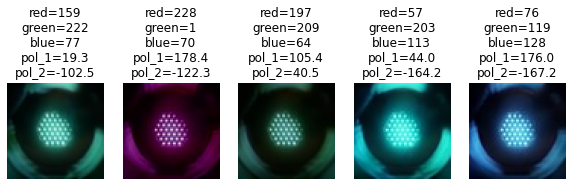

In [6]:
plt.figure(figsize=(N*2,2))
for i,output in enumerate(outputs):
    plt.subplot(1,N,i+1)
    plt.imshow(output)
    plt.title('red=%d\ngreen=%d\nblue=%d\npol_1=%0.1f\npol_2=%0.1f' % tuple(inputs.iloc[i][simulator.inputs_names]))
    plt.axis("off")

### Example 2: Compare to real images

We download a dataset of real images using the functionality provided in the `causalchamber` package. The downloaded dataset is stored in the path given by `root=` below.

For our experiment we will use the `lt_crl_benchmark_v1` dataset, which is described [here](TODO).

In [7]:
# Download the dataset
dataset = causalchamber.datasets.Dataset('lt_crl_benchmark_v1', root='./', download=True)

# Load the data (inputs, measurements and images) from one of the experiments
experiment = dataset.get_experiment(name='uniform')
observations = experiment.as_pandas_dataframe()
images = experiment.as_image_array(size='64')

Dataset lt_crl_benchmark_v1 found in "lt_crl_benchmark_v1".


We can directly use the `observations` dataframe as input to the simulator, since it contains the necessary columns. The additional columns are ignored by the simulator.

In [8]:
inputs = observations.iloc[[56, 78, 85, 90, 54, 88]] # Select some images to get a nice variation of colors
outputs = simulator.simulate_from_inputs(inputs)

Plot the results

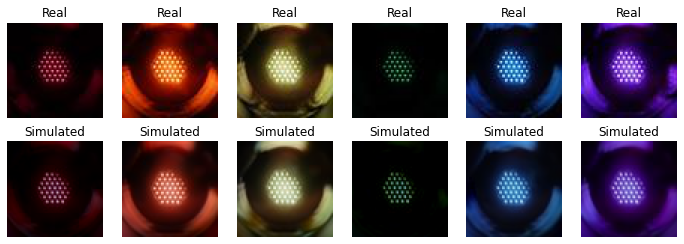

In [9]:
K = len(outputs)
plt.figure(figsize=(K*2,4))
for i,output in enumerate(outputs):
    plt.subplot(2,K,i+1)
    plt.imshow(images[inputs.index[i]])
    plt.title("Real")
    plt.axis("off")
    plt.subplot(2,K,K+i+1)
    plt.imshow(output)
    plt.title("Simulated")
    plt.axis("off")